In [2]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 24.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.4 MB/s eta 0:00:0000:0100:01


In [7]:
import numpy as np 
import pandas as pd 
import os
import shutil
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from sklearn.model_selection import train_test_split
from ultralytics import YOLO

In [10]:
label = {0 : 'Заяц', 1 : 'Кабан', 2 : 'Кошки', 3 : 'Куньи',
         4 : 'Медведь', 5 : 'Оленевые', 6 : 'Пантеры',
         7 : 'Полорогие', 8 : 'Собачие', 9 : 'Сурок'}

In [11]:
df = pd.read_csv('/kaggle/input/where-are-the-animals/data_for_summer/train_split.csv')
df

,image_name,detection
0,143a6e68a7a8233130523ee3a61500a0.JPG,4 0.4780943691730499 0.5708556771278381 0.3342...
1,da33b85db54db1045710aedfb8f0a26e.JPG,4 0.5346201062202454 0.6069518327713013 0.3259...
2,561cd359ad1707a1d80c2b73f78cd532.JPG,5 0.8759920001029968 0.5696250200271606 0.2480...
3,402e79a0ee09b9b4dec2e0fed8c98f99.JPG,1 0.021026235073804855 0.50728440284729 0.0420...
4,315b5c5348409ffcac36e0e6cfd605d7.JPG,2 0.46041667461395264 0.7762625813484192 0.407...
...,...,...
17657,900d58565de8e3c7f2a2a16d2d4395bb.JPG,7 0.3695310056209564 0.634343147277832 0.08489...
17658,69909389f8bb7d4e5b85f2ecafbdb8ff.JPG,7 0.3760420083999634 0.7616159319877625 0.4770...
17659,f381a2dba262745cc55413577245454a.JPG,1 0.38623046875 0.40258049964904785 0.265625 0...
17660,88aaad8a2597ccfab3decb99fecd3ccf.JPG,6 0.40335598587989807 0.6029740571975708 0.128...


In [5]:
img = cv2.imread('/kaggle/input/where-are-the-animals/data_for_summer/train/561cd359ad1707a1d80c2b73f78cd532.JPG')
ann = df.loc[2, 'detection']
animal, cx, cy, w, h = map(float, ann.split())
animal = int(animal)

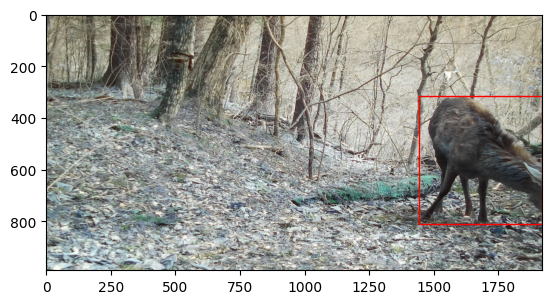

In [21]:
fig, ax = plt.subplots()
ax.imshow(img)
rect = patches.Rectangle((cx*img.shape[1] - 0.5*w*img.shape[1], cy*img.shape[0] - 0.5*h*img.shape[0]), w*img.shape[1], h*img.shape[0], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

In [12]:
df['class'] = df['detection'].apply(lambda x: x.split(';'))
df['class'] = df['class'].apply(lambda x: [symb.split()[0] for symb in x])
df['class'] = df['class'].apply(lambda x: x[0])
df

,image_name,detection,class
0,143a6e68a7a8233130523ee3a61500a0.JPG,4 0.4780943691730499 0.5708556771278381 0.3342...,4
1,da33b85db54db1045710aedfb8f0a26e.JPG,4 0.5346201062202454 0.6069518327713013 0.3259...,4
2,561cd359ad1707a1d80c2b73f78cd532.JPG,5 0.8759920001029968 0.5696250200271606 0.2480...,5
3,402e79a0ee09b9b4dec2e0fed8c98f99.JPG,1 0.021026235073804855 0.50728440284729 0.0420...,1
4,315b5c5348409ffcac36e0e6cfd605d7.JPG,2 0.46041667461395264 0.7762625813484192 0.407...,2
...,...,...,...
17657,900d58565de8e3c7f2a2a16d2d4395bb.JPG,7 0.3695310056209564 0.634343147277832 0.08489...,7
17658,69909389f8bb7d4e5b85f2ecafbdb8ff.JPG,7 0.3760420083999634 0.7616159319877625 0.4770...,7
17659,f381a2dba262745cc55413577245454a.JPG,1 0.38623046875 0.40258049964904785 0.265625 0...,1
17660,88aaad8a2597ccfab3decb99fecd3ccf.JPG,6 0.40335598587989807 0.6029740571975708 0.128...,6


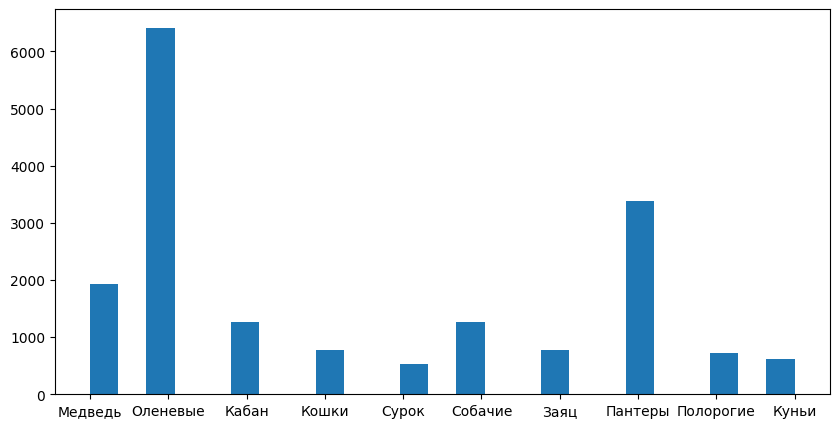

In [14]:
class_count = df['class']
class_count = class_count.apply(lambda x: x[0])
class_count = class_count.apply(lambda x: label[int(x)])
plt.figure(figsize=(10, 5))
plt.hist(class_count, bins = 25)
plt.show()

In [15]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state = 42, stratify=df['class'])
train_df.drop(['class'], axis=1, inplace=True)
val_df.drop(['class'], axis=1, inplace=True)
print(train_df.shape)
print(val_df.shape)

(14129, 2)
(3533, 2)


In [16]:
def prepare_yolo_format(df, images_src_dir, output_dir):
    images_train_dir = os.path.join(output_dir, 'images', 'train')
    images_val_dir = os.path.join(output_dir, 'images', 'val')
    labels_train_dir = os.path.join(output_dir, 'labels', 'train')
    labels_val_dir = os.path.join(output_dir, 'labels', 'val')

    for d in [images_train_dir, images_val_dir, labels_train_dir, labels_val_dir]:
        os.makedirs(d, exist_ok=True)

    def save_labels(image_name, detection, label_dir):
        label_path = os.path.join(label_dir, image_name.replace('.JPG', '.txt'))
        
        if detection == '-1' or detection.strip() == '':
            with open(label_path, 'w') as f:
                pass
        else:
            objects = detection.split(';')
            with open(label_path, 'w') as f:
                for obj in objects:
                    parts = obj.strip().split()
                    class_id, cx, cy, w, h = parts
                    f.write(f"{class_id} {cx} {cy} {w} {h}\n")

    return images_train_dir, images_val_dir, labels_train_dir, labels_val_dir, save_labels

output_dir = '/kaggle/working/dataset'

images_train_dir, images_val_dir, labels_train_dir, labels_val_dir, save_labels = prepare_yolo_format(train_df, '/kaggle/input/where-are-the-animals/data_for_summer/train', output_dir)

for idx, row in train_df.iterrows():
    img_name = row['image_name']
    src_img_path = os.path.join('/kaggle/input/where-are-the-animals/data_for_summer/train', img_name)
    dst_img_path = os.path.join(images_train_dir, img_name)
    shutil.copy(src_img_path, dst_img_path)

    save_labels(img_name, row['detection'], labels_train_dir)

images_train_dir, images_val_dir, labels_train_dir, labels_val_dir, save_labels = prepare_yolo_format(val_df, '/kaggle/input/where-are-the-animals/data_for_summer/train', output_dir)

for idx, row in val_df.iterrows():
    img_name = row['image_name']
    src_img_path = os.path.join('/kaggle/input/where-are-the-animals/data_for_summer/train', img_name)
    dst_img_path = os.path.join(images_val_dir, img_name)
    shutil.copy(src_img_path, dst_img_path)

    save_labels(img_name, row['detection'], labels_val_dir)


In [17]:
import yaml

data = {
    'train': '/kaggle/working/dataset/images/train',
    'val': '/kaggle/working/dataset/images/val',
    'nc': 10,
    'names': ['Заяц', 'Кабан', 'Кошки', 'Куньи', 'Медведь', 'Оленевые', 'Пантеры', 'Полорогие', 'Собачие', 'Сурок']
}

with open('/kaggle/working/data.yaml', 'w', encoding='utf-8') as f:
    yaml.dump(data, f, allow_unicode=True)

In [18]:
model = YOLO('yolo11s.pt')
model.train(data='data.yaml',
            epochs=20,
            batch = 16,
            imgsz=640,
            augment=True,
            fliplr=0.5,
            hsv_h=0.015,
            hsv_s=0.7,
            hsv_v=0.4,
           )

100%|██████████| 18.4M/18.4M [00:00<00:00, 181MB/s]


Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.02, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pro

100%|██████████| 22.2M/22.2M [00:00<00:00, 155MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 117MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3018.1±1040.2 MB/s, size: 287.1 KB)


train: Scanning /kaggle/working/dataset/labels/train... 14129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14129/14129 [00:09<00:00, 1519.76it/s]


train: New cache created: /kaggle/working/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 463.9±97.5 MB/s, size: 257.6 KB)


val: Scanning /kaggle/working/dataset/labels/val... 3533 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3533/3533 [00:02<00:00, 1292.72it/s]


val: New cache created: /kaggle/working/dataset/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.16G      1.365      5.882      1.421         37        640:   0%|          | 2/884 [00:01<09:44,  1.51it/s]

       1/20      4.16G      1.412      6.336      1.473         35        640:   0%|          | 3/884 [00:01<07:52,  1.87it/s]
100%|██████████| 755k/755k [00:00<00:00, 27.1MB/s]
       1/20      4.28G      1.098      1.743      1.233          2        640: 100%|██████████| 884/884 [05:03<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:25<00:00,  4.39it/s]


                   all       3533       4603      0.631      0.631      0.666      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.31G      1.098       1.19       1.24          1        640: 100%|██████████| 884/884 [04:55<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:25<00:00,  4.39it/s]


                   all       3533       4603       0.67      0.619      0.661      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.37G      1.084       1.14      1.237          5        640: 100%|██████████| 884/884 [04:55<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:24<00:00,  4.48it/s]


                   all       3533       4603      0.719      0.589      0.653       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.41G      1.043      1.035      1.208          2        640: 100%|██████████| 884/884 [04:55<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:27<00:00,  3.99it/s]


                   all       3533       4603      0.832       0.69      0.774       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.45G      1.003     0.9552      1.184          2        640: 100%|██████████| 884/884 [04:58<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:27<00:00,  4.04it/s]


                   all       3533       4603      0.843      0.716      0.819      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.49G     0.9622     0.8787      1.159          3        640: 100%|██████████| 884/884 [04:56<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:24<00:00,  4.56it/s]


                   all       3533       4603      0.859      0.757      0.849      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.53G     0.9316     0.8337       1.14          4        640: 100%|██████████| 884/884 [04:51<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:23<00:00,  4.65it/s]

                   all       3533       4603      0.881      0.785       0.86      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.56G     0.9069      0.787      1.126          1        640: 100%|██████████| 884/884 [04:51<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:23<00:00,  4.66it/s]

                   all       3533       4603      0.893      0.783      0.873       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.61G      0.871     0.7513      1.103          3        640: 100%|██████████| 884/884 [04:51<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:23<00:00,  4.74it/s]


                   all       3533       4603      0.894       0.81      0.893      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.65G     0.8478     0.7118       1.09          4        640: 100%|██████████| 884/884 [04:52<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:25<00:00,  4.39it/s]


                   all       3533       4603      0.894      0.822      0.901      0.723
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.68G     0.7867     0.6207      1.051          1        640: 100%|██████████| 884/884 [04:54<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:24<00:00,  4.62it/s]


                   all       3533       4603       0.92      0.825      0.904      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.72G     0.7608     0.5828      1.039          1        640: 100%|██████████| 884/884 [04:54<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:25<00:00,  4.41it/s]

                   all       3533       4603      0.907      0.847      0.911      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.76G     0.7373     0.5545      1.028          1        640: 100%|██████████| 884/884 [04:51<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:23<00:00,  4.67it/s]

                   all       3533       4603      0.932      0.846      0.921      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       4.8G       0.71     0.5202      1.009          1        640: 100%|██████████| 884/884 [04:51<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:23<00:00,  4.71it/s]


                   all       3533       4603      0.926      0.835      0.916       0.75

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.84G     0.6891     0.4844      1.004          1        640: 100%|██████████| 884/884 [04:51<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:23<00:00,  4.75it/s]

                   all       3533       4603       0.94      0.865      0.933      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.88G     0.6567     0.4509     0.9805          1        640: 100%|██████████| 884/884 [04:50<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:23<00:00,  4.69it/s]

                   all       3533       4603      0.949       0.87      0.935      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.92G     0.6404     0.4283     0.9723          2        640: 100%|██████████| 884/884 [04:50<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:23<00:00,  4.66it/s]

                   all       3533       4603      0.944      0.874       0.94      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.96G     0.6164     0.4005     0.9611          1        640: 100%|██████████| 884/884 [04:51<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:23<00:00,  4.63it/s]

                   all       3533       4603      0.947      0.883      0.943       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         5G      0.595      0.381      0.949          1        640: 100%|██████████| 884/884 [04:51<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:23<00:00,  4.65it/s]

                   all       3533       4603      0.946      0.898      0.947      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.04G     0.5755     0.3634     0.9418          1        640: 100%|██████████| 884/884 [04:50<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:23<00:00,  4.72it/s]

                   all       3533       4603       0.96      0.891       0.95      0.797



20 epochs completed in 1.770 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 19.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s summary (fused): 100 layers, 9,416,670 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:35<00:00,  3.10it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       3533       4603      0.939      0.898      0.954      0.803
                  Заяц        154        154      0.904      0.914      0.964      0.801
                 Кабан        252        341      0.955      0.925      0.968      0.856
                 Кошки        156        156      0.887      0.853      0.929      0.762
                 Куньи        124        125      0.915       0.86      0.932      0.731
               Медведь        386        408       0.98      0.971      0.988        0.9
              Оленевые       1283       1977      0.967       0.88      0.959      0.838
               Пантеры        675        714      0.971      0.944      0.984      0.879
             Полорогие        143        307      0.937       0.85      0.922      0.746
               Собачие        253        297      0.947      0.848       0.94      0.774
                 Сурок        107        124      0.928       0.93      0.956       0.74
Speed: 0.1ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a28b65b0c50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [ ]:
results = model.predict(source='/kaggle/input/where-are-the-animals/data_for_summer/test', conf=0.25, save=False)

In [20]:
submission = []

for r in results:
    image_name = r.path.split('/')[-1]
    if len(r.boxes) == 0:
        submission.append([image_name, '-1'])
    else:
        preds = []
        for b in r.boxes:
            cls = int(b.cls)
            cx, cy, w, h = b.xywhn[0].tolist()
            conf = b.conf.item()
            preds.append(f"{cls} {cx:.4f} {cy:.4f} {w:.4f} {h:.4f} {conf:.4f}")
        submission.append([image_name, ';'.join(preds)])

res = pd.DataFrame(submission, columns=['image_name', 'predicted_detection'])
res.index.name = 'index'
res.to_csv('submission.csv')